## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from xgboost import XGBClassifier # XGboost is used to achieve high accuracy on predictions.

## Read Dataset

In [2]:
df=pd.read_csv('NIFTY 50_Data.csv')
df

Date      Open      High       Low     Close
0    02-Mar-22  16593.10  16678.50  16478.65  16605.95
1    03-Mar-22  16723.20  16768.95  16442.95  16498.05
2    04-Mar-22  16339.45  16456.00  16133.80  16245.35
3    07-Mar-22  15867.95  15944.60  15711.45  15863.15
4    08-Mar-22  15747.75  16028.75  15671.45  16013.45
..         ...       ...       ...       ...       ...
288  03-May-23  18113.80  18116.35  18042.40  18089.85
289  04-May-23  18081.00  18267.45  18066.70  18255.80
290  05-May-23  18117.30  18216.95  18055.45  18069.00
291  08-May-23  18120.60  18286.95  18100.30  18264.40
292  09-May-23  18303.40  18344.20  18229.65  18265.95

[293 rows x 5 columns]

In [3]:
df.head()

Date      Open      High       Low     Close
0  02-Mar-22  16593.10  16678.50  16478.65  16605.95
1  03-Mar-22  16723.20  16768.95  16442.95  16498.05
2  04-Mar-22  16339.45  16456.00  16133.80  16245.35
3  07-Mar-22  15867.95  15944.60  15711.45  15863.15
4  08-Mar-22  15747.75  16028.75  15671.45  16013.45

## EDA

In [4]:
'Information of dataset using info function'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    293 non-null    object 
 1   Open    293 non-null    float64
 2   High    293 non-null    float64
 3   Low     293 non-null    float64
 4   Close   293 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.6+ KB


In [5]:
'Central tendency of dataset using describe function'
df.describe()

Open          High           Low         Close
count    293.000000    293.000000    293.000000    293.000000
mean   17348.698976  17432.734642  17241.851706  17341.216041
std      800.296618    785.375343    808.989696    799.308928
min    15272.650000  15382.500000  15183.400000  15293.500000
25%    16900.650000  17037.600000  16788.600000  16887.350000
50%    17519.400000  17625.550000  17429.700000  17530.850000
75%    17920.850000  18022.800000  17818.400000  17915.050000
max    18871.950000  18887.600000  18778.200000  18812.500000

In [6]:
'Check null values in dataset'
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
'Convert datatype of date to datetime'
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    293 non-null    datetime64[ns]
 1   Open    293 non-null    float64       
 2   High    293 non-null    float64       
 3   Low     293 non-null    float64       
 4   Close   293 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.6 KB


In [9]:
'Calculate the daily range (high - low)'

df['Range'] = df['High'] - df['Low']

'Calculate the average range'

avg_range = df['Range'].mean()
print('Average daily range:', avg_range)

Average daily range: 190.88293515358356


## Graphical Representation 

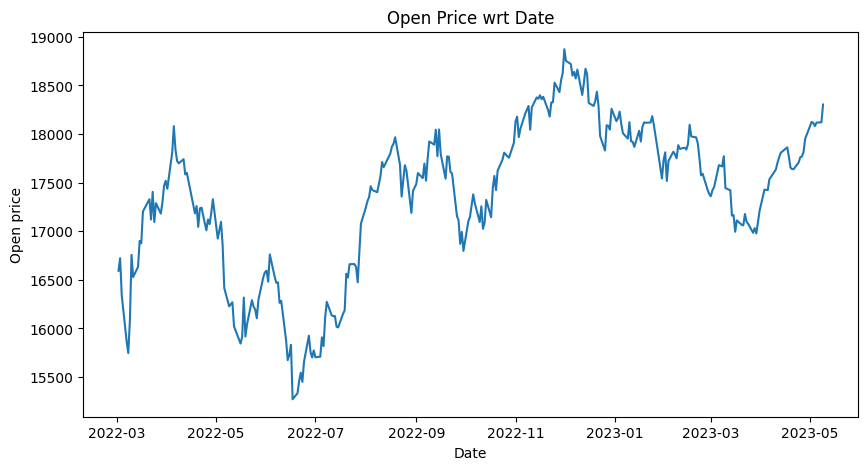

In [10]:
'Plot open rate as with respect to date'
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open price')
plt.title('Open Price wrt Date')
plt.show()

C:\Users\IN284372\AppData\Local\Temp\ipykernel_8428\350191310.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


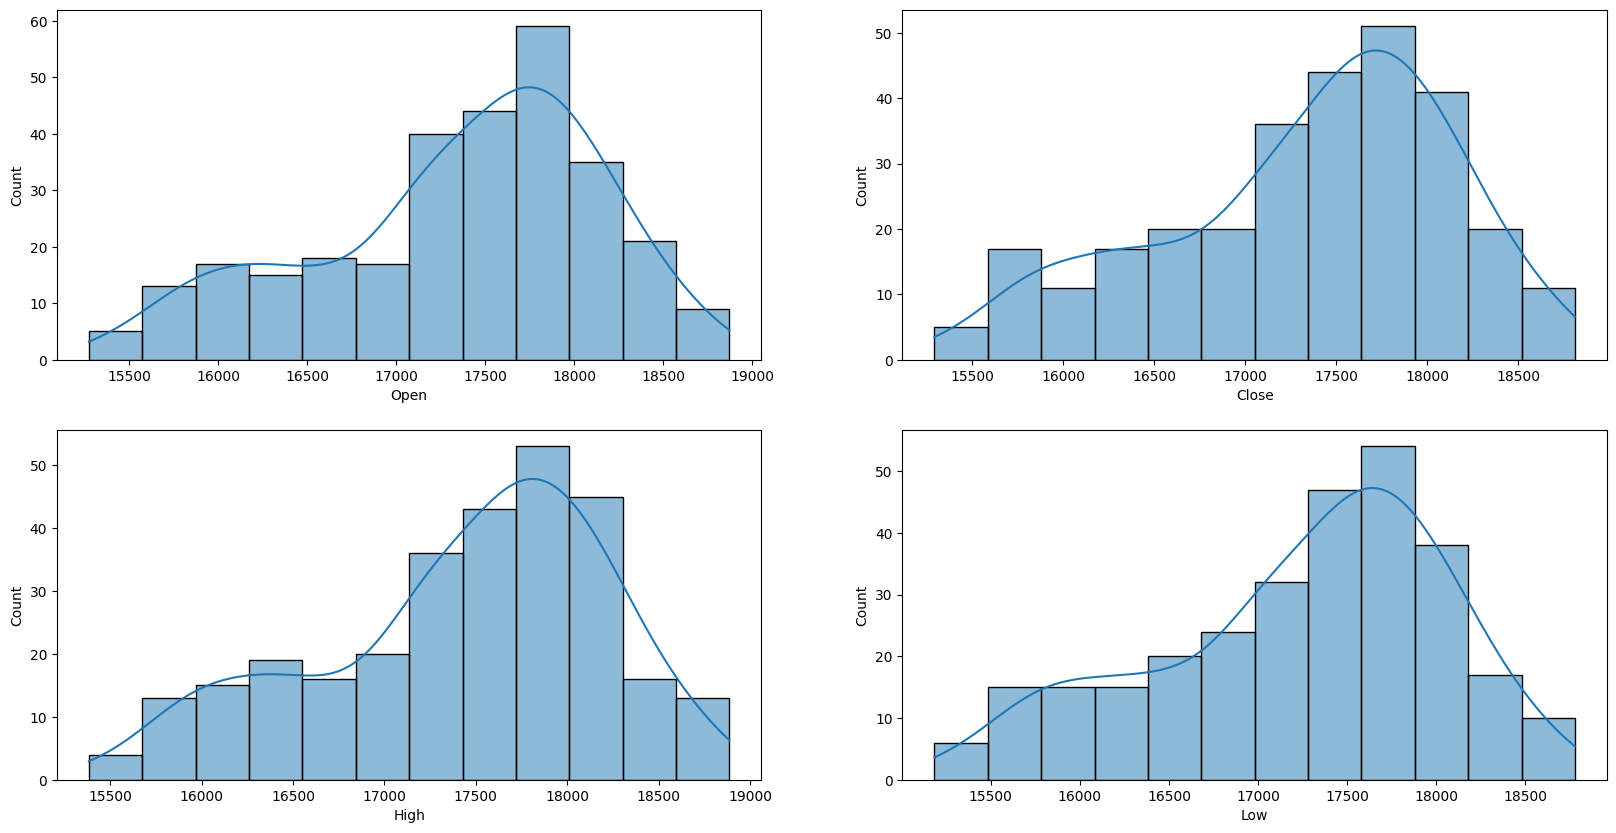

In [11]:
'Histogram plot'
prices = ['Open','Close', 'High', 'Low']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(prices):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],kde=True)
plt.show()

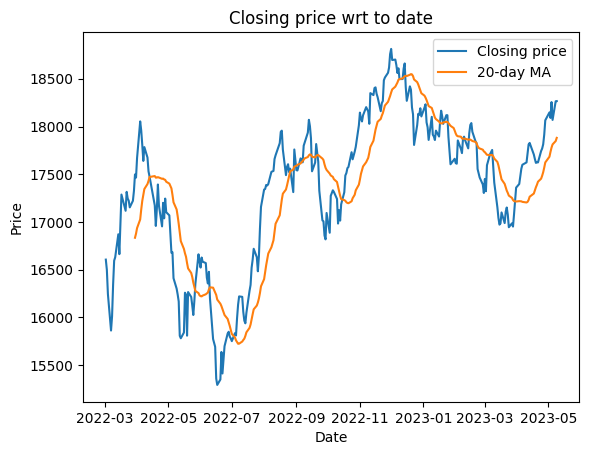

In [12]:
'Calculate the 20-days moving average'
df['MA20'] = df['Close'].rolling(window=20).mean() #df.rolling window is used to take K set of data like 1-20,2-21,3-23,....

'Create a line plot of the closing prices and the moving average'
plt.plot(df['Date'], df['Close'], label='Closing price')
plt.plot(df['Date'], df['MA20'], label='20-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing price wrt to date')
plt.legend()
plt.show()

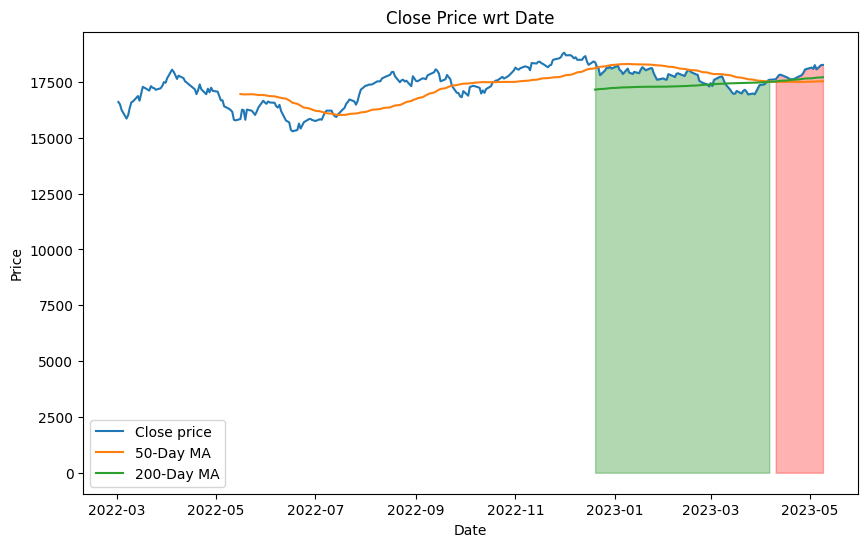

In [13]:
'Trend identification using 50-200 Moving Average'

df['MA50']=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()


plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close price' )
plt.plot(df['Date'],df['MA50'], label='50-Day MA')
plt.plot(df['Date'],df['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price wrt Date')
plt.legend()

'Identify bullish and bearish trends'
bullish = df['MA50'] > df['MA200']
bearish = df['MA50'] < df['MA200']
plt.fill_between(df['Date'], df['Close'], where=bullish,  color='green', alpha=0.3) #filling green color where market is bullish
plt.fill_between(df['Date'], df['Close'], where=bearish,  color='red', alpha=0.3) # filling red color where market is bearish                 

In [14]:
'Drawing Candle stick chart using  plotly'
import plotly.graph_objects as go
import plotly.io as pio # to save graph

fig = go.Figure(data=[go.Candlestick(x=df['Date'],open=df.Open, high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=True,title='NIFTY-50',
    yaxis_title='Prices',xaxis_title='Date')
    
fig.show()
pio.write_image(fig, file='bar.png')

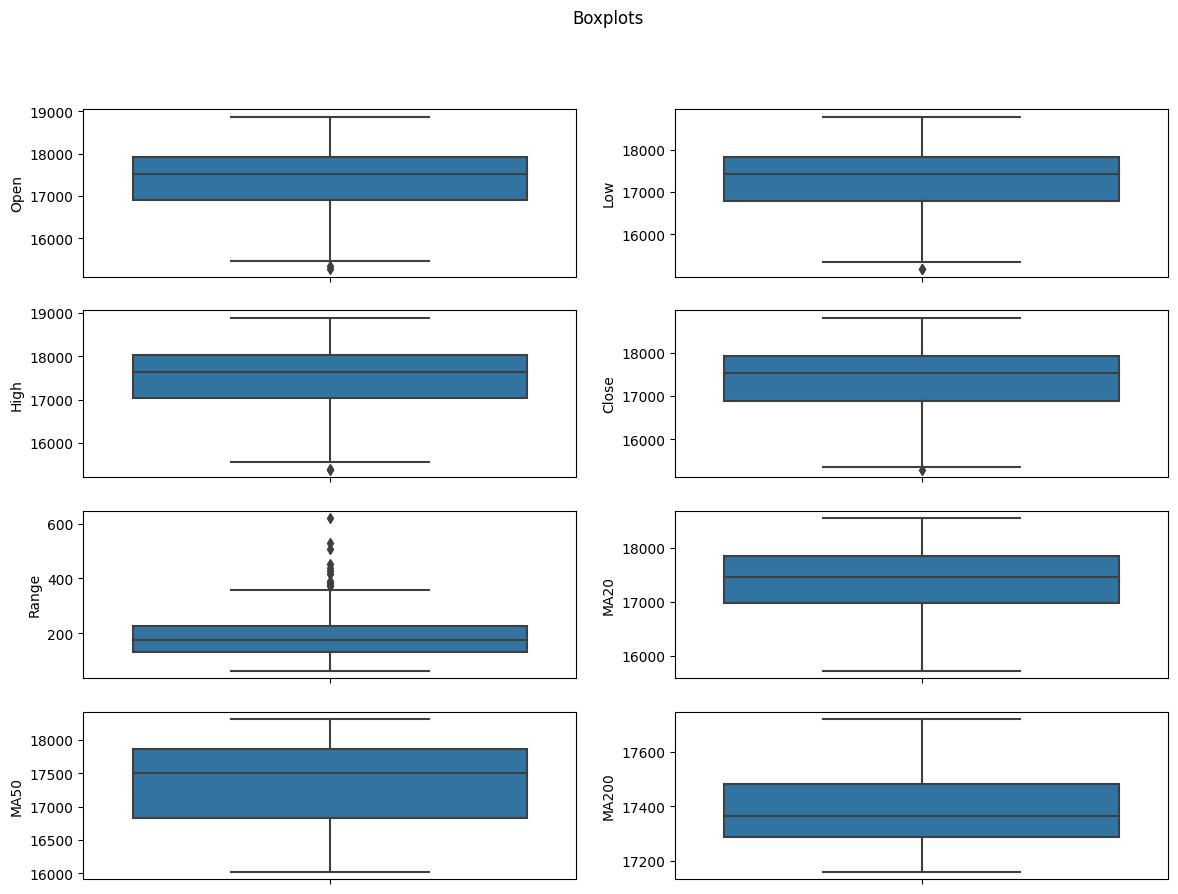

In [15]:
'Creating Box plot to identify outliers'
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
# Creating a boxplot for each column on a different subplot
sns.boxplot(y=df['Open'],ax=axs[0,0])
sns.boxplot(y=df['Low'], ax=axs[0, 1])
sns.boxplot(y=df['High'], ax=axs[1, 0])
sns.boxplot(y=df['Close'], ax=axs[1, 1])
sns.boxplot(y=df['Range'], ax=axs[2, 0])
sns.boxplot(y=df['MA20'], ax=axs[2, 1])
sns.boxplot(y=df['MA50'], ax=axs[3, 0])
sns.boxplot(y=df['MA200'], ax=axs[3, 1])
fig.suptitle('Boxplots')
plt.show()

In [16]:
'Removing outlier from Range column using IQR method'

q1, q3 = np.percentile(df['Range'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
f_range = df[(df['Range'] > lower_bound) & (df['Range'] < upper_bound)]
df['Range']=f_range['Range']


In [17]:
'Replacing null values with median function'
mean=df['Range'].mean()
df['Range']=df['Range'].fillna(mean)
df.Range.isnull().sum()

0

In [18]:
'remove one outlier'
df['Range']=df['Range'].replace(342.75,mean)


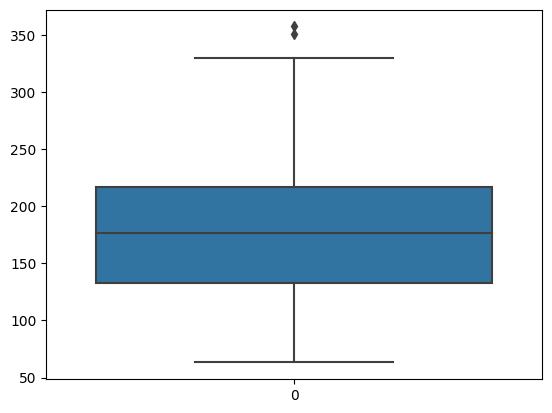

In [19]:
'Check for outliers in range column'
sns.boxplot(df['Range'])
plt.show()

C:\Users\IN284372\AppData\Local\Temp\ipykernel_8428\1575853497.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



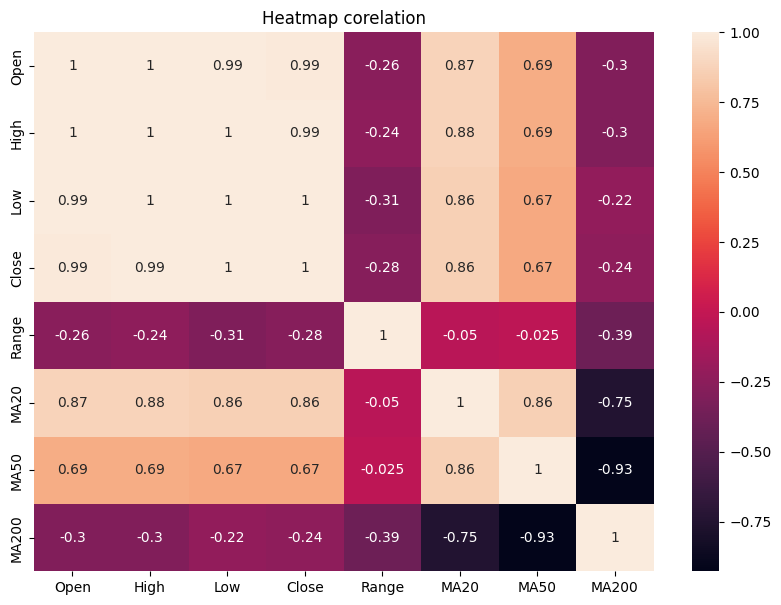

In [20]:
'Co-relation between each atributes of dataset'
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap corelation')
plt.show()

Corelation graphs

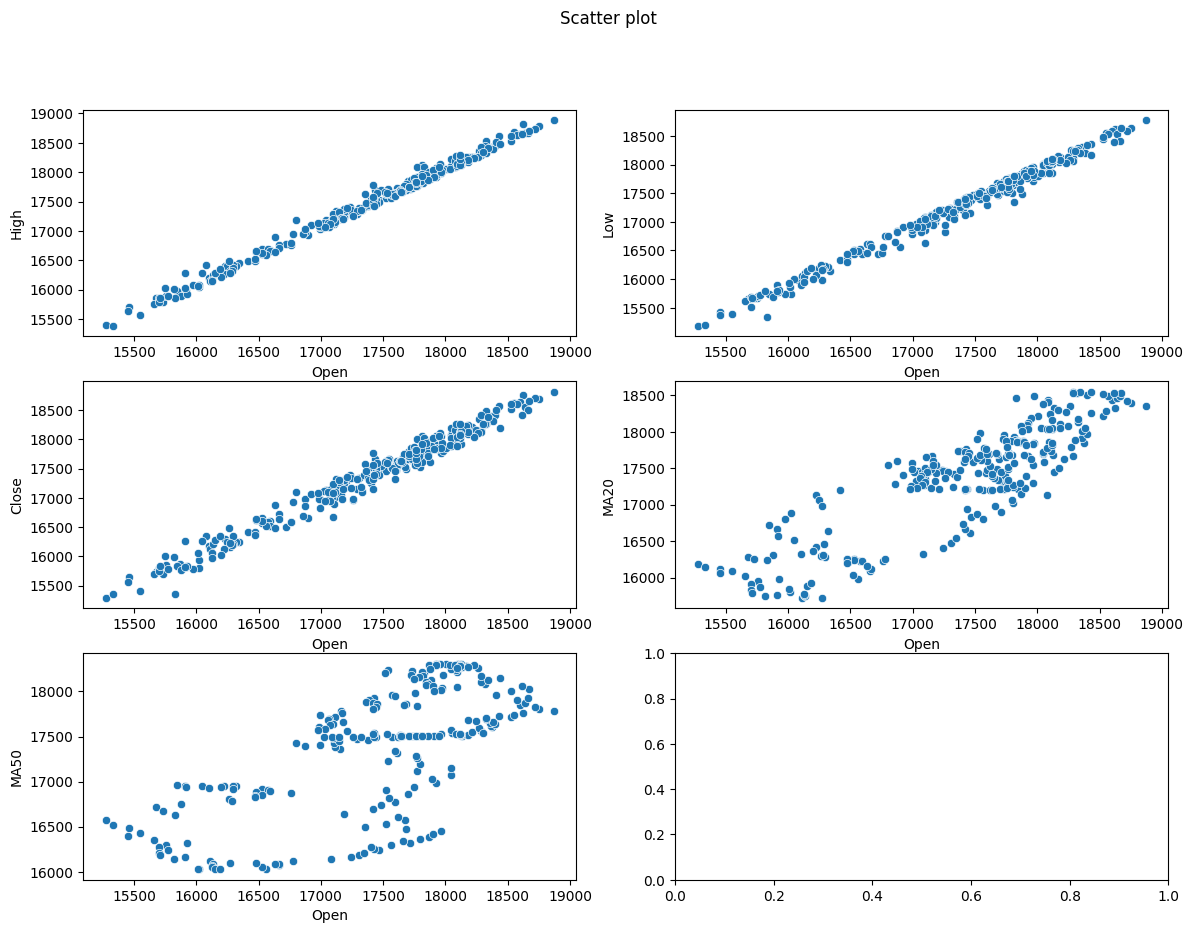

In [21]:
'Creating a scatterplot for each column on a different subplot'
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

sns.scatterplot(x=df['Open'],y=df['High'],ax=axs[0,0])
sns.scatterplot(x=df['Open'],y=df['Low'], ax=axs[0, 1])
sns.scatterplot(x=df['Open'],y=df['Close'], ax=axs[1, 0])
sns.scatterplot(x=df['Open'],y=df['MA20'], ax=axs[1, 1])
sns.scatterplot(x=df['Open'],y=df['MA50'], ax=axs[2, 0])

fig.suptitle('Scatter plot')
plt.show()

## Machine Learning 

In [22]:
'Define feature and target variable'
X = df[['Open', 'High', 'Low', 'Close', 'Range']]
y = df['Close']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
'transform data'
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
'Linear Rigression'
from sklearn.linear_model import LinearRegression
# train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# print the model coefficients
print(model.coef_)

[-2.14692184e-16 -1.33226763e-15  1.49880108e-15  1.00000000e+00
  2.09597964e-15]


In [26]:
'Model evaluation'
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.158123021156101e-13
Mean Squared Error: 3.925602907031318e-25
Root Mean Squared Error: 6.265463196788661e-13
